In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sql_export_order_lines_fixed_all.csv', usecols = list(np.arange(1,15)), parse_dates=True)

In [3]:
df.head(2)

,field_content,invoice_record_id,title,vendor_code,paid_amt,fund_code,code_num,code,note,paid_date_gmt,invoice_date_gmt,invoice_number_text,form_code,permanent_call_number
0,|aKF1375|b.B76 2020,472446519792,Bromberg and Ribstein on partnership / Christi...,wolkl,1705.11,27,27,92llf,2021-2,2021-08-23 00:00:00-07,2021-07-09 00:00:00-07,5510516894,l,KF1375 .B76 2020
1,|aKFN8630 1959|b.A222,472446507079,North Dakota century code : comprising statute...,lnmb,76.21,23,23,92bds,08 RV 1a,2008-05-21 00:00:00-07,2021-07-06 00:00:00-07,6745867X,s,KFN8630 1959 .A222


In [4]:
df['invoice_date_gmt'] = pd.to_datetime(df['invoice_date_gmt'])
df.head(2)

,field_content,invoice_record_id,title,vendor_code,paid_amt,fund_code,code_num,code,note,paid_date_gmt,invoice_date_gmt,invoice_number_text,form_code,permanent_call_number
0,|aKF1375|b.B76 2020,472446519792,Bromberg and Ribstein on partnership / Christi...,wolkl,1705.11,27,27,92llf,2021-2,2021-08-23 00:00:00-07,2021-07-09 00:00:00-07:00,5510516894,l,KF1375 .B76 2020
1,|aKFN8630 1959|b.A222,472446507079,North Dakota century code : comprising statute...,lnmb,76.21,23,23,92bds,08 RV 1a,2008-05-21 00:00:00-07,2021-07-06 00:00:00-07:00,6745867X,s,KFN8630 1959 .A222


In [5]:
df['invoice_year'] = [x.year for x in df['invoice_date_gmt']]

In [6]:
df['vendor_code'] = df['vendor_code'].str.strip()

In [7]:
df_groupby_vendor = df.groupby(['vendor_code', 'invoice_year']).agg({'paid_amt':'sum'}).reset_index()

In [8]:
df_groupby_vendor

,vendor_code,invoice_year,paid_amt
0,aaa,2007,101.89
1,aaa,2012,112.61
2,aaa,2014,95.00
3,aaa,2016,190.00
4,aals,2008,8.50
...,...,...,...
702,ybp,2016,123.25
703,ybp,2017,267.15
704,ybp,2018,499.00
705,ybp,2019,126.00


In [9]:
df.groupby(['title', 'invoice_year', 'code']).sum()

invoice_record_id  \
title                                              invoice_year code                       
2006 Negotiation competition championship round... 2006         92dvd       472446504211   
2006 client counseling competition national finals 2007         92dvd      1417339514136   
2006-07 client counseling competition champions... 2007         92dvd       472446506232   
2008-09 Client Counseling Competition champions... 2009         92dvd       472446509760   
2009-10 Negotiation Competition championship ro... 2011         92dvd       944893024917   
...                                                                                  ...   
eDiscovery and digital evidence                    2017         92bds       472446518022   
                                                   2018         92bds       472446518617   
                                                   2019         92bds       472446519257   
                                                   2020         92bds       472446519604   
the Italian civil code / Susanna Beltramo          2012         92bds       472446513129   

                                                                       paid_amt  \
title                                              invoice_year code              
2006 Negotiation competition championship round... 2006         92dvd    187.63   
2006 client counseling competition national finals 2007         92dvd    174.95   
2006-07 client counseling competition champions... 2007         92dvd    176.91   
2008-09 Client Counseling Competition champions... 2009         92dvd    114.75   
2009-10 Negotiation Competition championship ro... 2011         92dvd    142.25   
...                                                                         ...   
eDiscovery and digital evidence                    2017         92bds    203.78   
                                                   2018         92bds    233.81   
                                                   2019         92bds    269.20   
                                                   2020         92bds    309.95   
the Italian civil code / Susanna Beltramo          2012         92bds    270.27   

                                                                       fund_code  \
title                                              invoice_year code               
2006 Negotiation competition championship round... 2006         92dvd          2   
2006 client counseling competition national finals 2007         92dvd          6   
2006-07 client counseling competition champions... 2007         92dvd          2   
2008-09 Client Counseling Competition champions... 2009         92dvd          2   
2009-10 Negotiation Competition championship ro... 2011         92dvd          4   
...                                                                          ...   
eDiscovery and digital evidence                    2017         92bds         23   
                                                   2018         92bds         23   
                                                   2019         92bds         23   
                                                   2020         92bds         23   
the Italian civil code / Susanna Beltramo          2012         92bds         23   

                                                                       code_num  
title                                              invoice_year code             
2006 Negotiation competition championship round... 2006         92dvd         2  
2006 client counseling competition national finals 2007         92dvd         6  
2006-07 client counseling competition champions... 2007         92dvd         2  
2008-09 Client Counseling Competition champions... 2009         92dvd         2  
2009-10 Negotiation Competition championship ro... 2011         92dvd         4  
...                                                                         ...  
eDiscovery and digital evidence              

In [10]:
df_group = df.groupby(['code', 'invoice_year']).sum()['paid_amt'].reset_index()

In [11]:
fund_codes = df['code'].unique()

In [12]:
fund_codes

array(['92llf', '92bds', '92ubs', '92mon', '92nws', '92onl', '92per',
       '92fic', '92dvd', '92bks', '92cdr', '92vid'], dtype=object)

In [13]:
[x for x in fund_codes]

['92llf',
 '92bds',
 '92ubs',
 '92mon',
 '92nws',
 '92onl',
 '92per',
 '92fic',
 '92dvd',
 '92bks',
 '92cdr',
 '92vid']

In [14]:
df_group

,code,invoice_year,paid_amt
0,92bds,2004,72.35
1,92bds,2005,50381.94
2,92bds,2006,236383.89
3,92bds,2007,197017.52
4,92bds,2008,207229.93
...,...,...,...
163,92ubs,2018,30145.26
164,92ubs,2019,35190.79
165,92ubs,2020,29868.01
166,92ubs,2021,18720.41


# By Fund Code

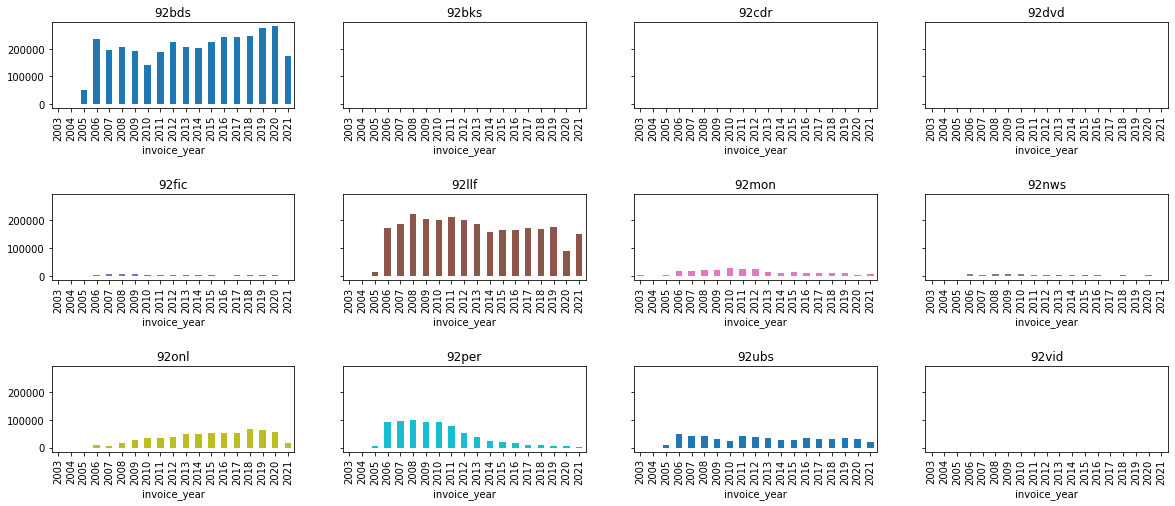

In [15]:
df_group.pivot(index='invoice_year', columns='code', values='paid_amt').plot(kind='bar', subplots=True, figsize=(20, 30), sharey=True, layout=(10,4), sharex=False, legend=False)
plt.subplots_adjust(hspace=1)
plt.show()

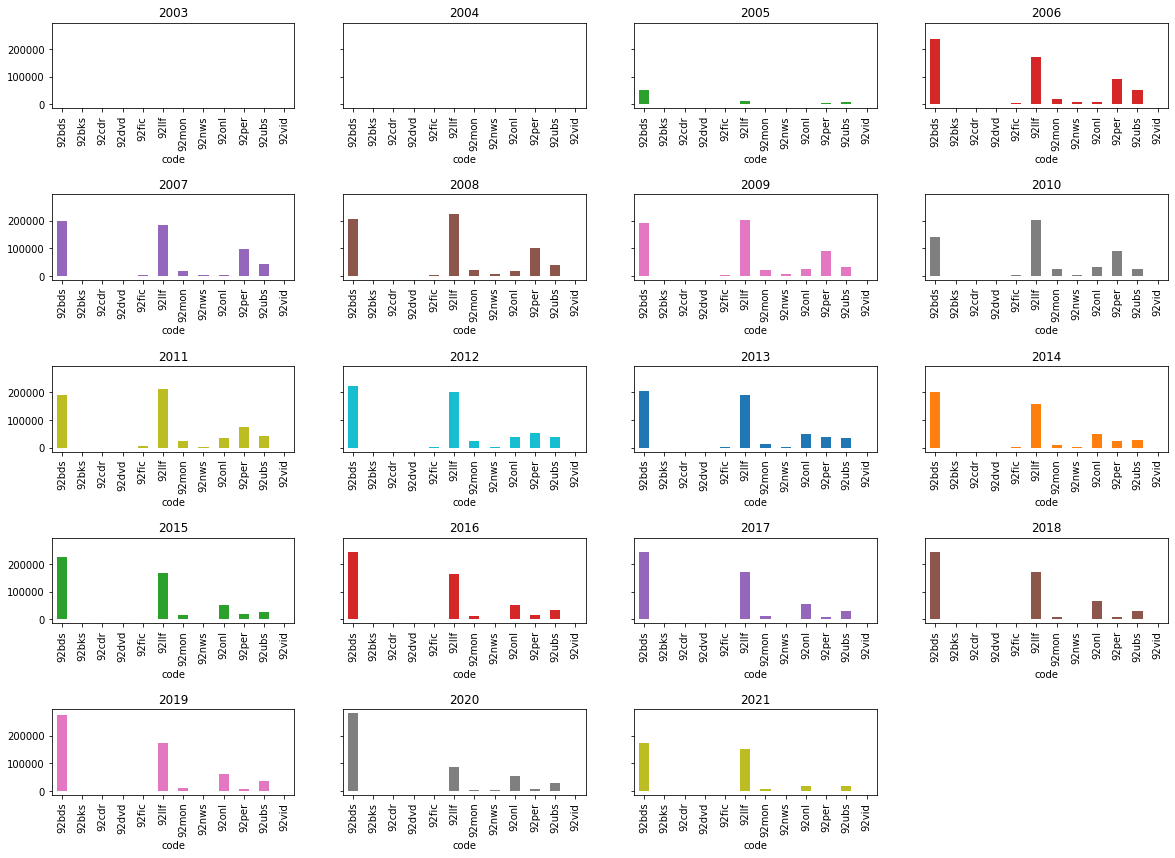

In [16]:
df_group.pivot(index='code', columns='invoice_year', values='paid_amt').plot(kind='bar', subplots=True, figsize=(20, 30), sharey=True, sharex=False, legend=False,
                                                                            layout=(10,4))
plt.subplots_adjust(hspace=1)
plt.show()

In [17]:
df_groupby_vendor['vendor_code'].unique()

array(['aaa', 'aals', 'aba', 'aca', 'ali', 'aliab', 'alibr', 'amjud',
       'amne', 'argnt', 'aspen', 'beck', 'bern', 'blac', 'black', 'blcku',
       'bna', 'bnab', 'bnai', 'brila', 'butol', 'buttc', 'bwp', 'cadep',
       'cana', 'cap', 'cars', 'cba', 'cch', 'ceb', 'chron', 'clrc',
       'couts', 'cq', 'djc', 'else', 'estev', 'gale', 'gaunt', 'gpo',
       'harr', 'hein', 'ila', 'james', 'japt', 'jeff', 'jnet', 'juris',
       'lawpu', 'lexnx', 'ljp', 'lnmb', 'lnmbc', 'lrp', 'manh', 'mara',
       'midw', 'natun', 'nbn', 'ncsc', 'none', 'ocea', 'oja', 'oxf',
       'pli', 'proq', 'ria', 'rocky', 'sage', 'sbca', 'solan', 'sweet',
       'swetb', 'trans', 'tranx', 'turp', 'turpk', 'unip', 'unpub',
       'west', 'westa', 'wiley', 'wolkl', 'ybp'], dtype=object)

# By Vendor

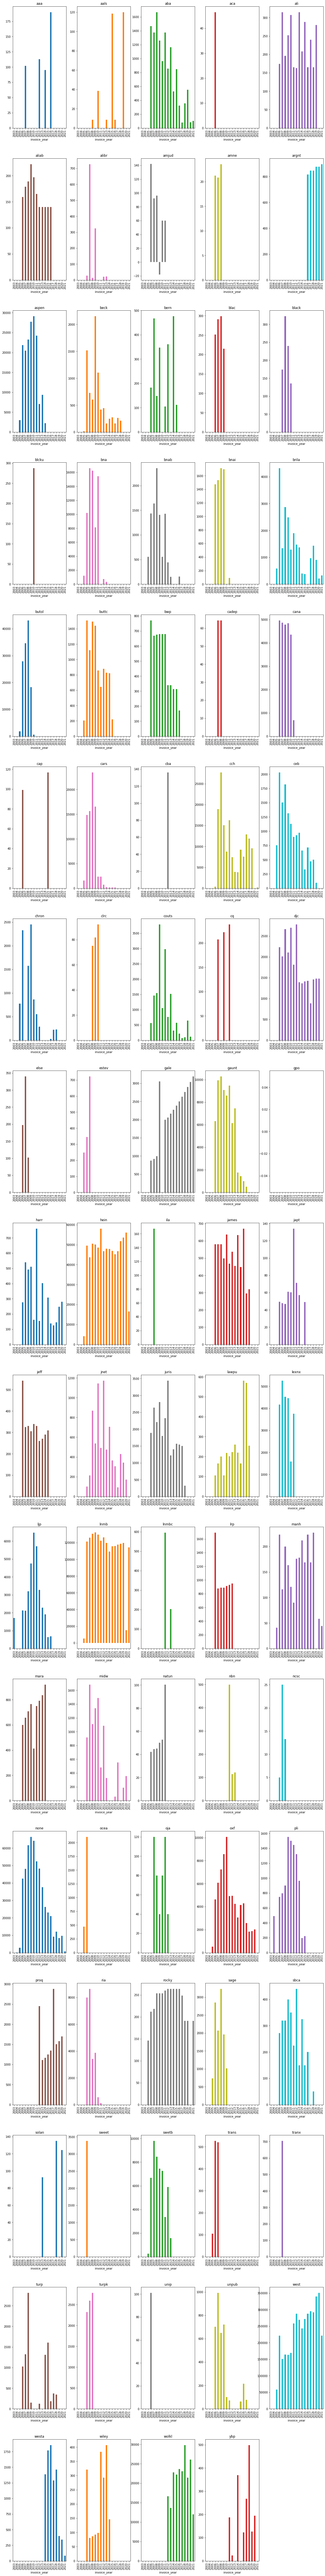

In [18]:
df_groupby_vendor.pivot(index='invoice_year', columns='vendor_code', values='paid_amt').plot(kind='bar', subplots=True, figsize=(20, 300), sharex=False, legend=False,
                                                                            layout=(30,5))
plt.subplots_adjust(hspace=.25)
plt.show()

# Subject Headings

In [19]:
df['field_content']

0          |aKF1375|b.B76 2020
1        |aKFN8630 1959|b.A222
2             |aKFC995|b.C3522
3              |aKF395.A4|bI57
4               |aKF105|b.F432
                 ...          
26206           |aKF1655|b.A37
26207      |aKF2979|b.D72 2000
26208           |aKF2765|b.B76
26209      |aKF1164|b.M37 1996
26210     |aKF1649|b.V327 1985
Name: field_content, Length: 26211, dtype: object

In [20]:
# extract subject heading
df['subject_heading'] = df['field_content'].str.extract(r'([^\|a][A-Z]{0,4})')

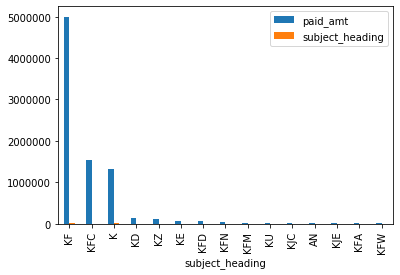

In [21]:
df.groupby(['subject_heading']).agg({'paid_amt':'sum', 'subject_heading':'count'}).sort_values('paid_amt', ascending=False).head(15).plot(kind='bar')